In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("housing_prices.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'housing_prices.csv'

In [ ]:
df.shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#finding duplicate values
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [ ]:
#removing uneccesary features
df.drop(["prefarea"],axis=1,inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
#Checking Null Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

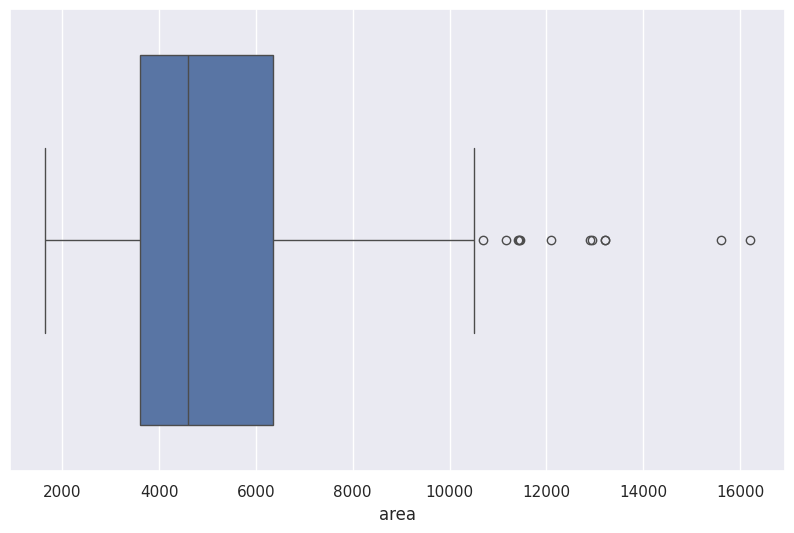

In [ ]:
#Checking for outliers with box plots
plt.figure(figsize=(10,6))
sns.boxplot(x=df["area"])
plt.show()

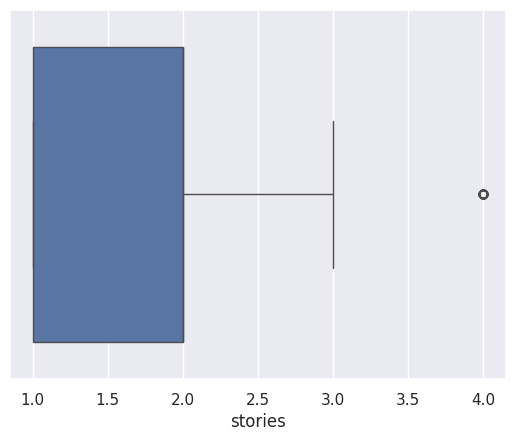

In [ ]:
sns.boxplot(x=df["stories"])
plt.show()

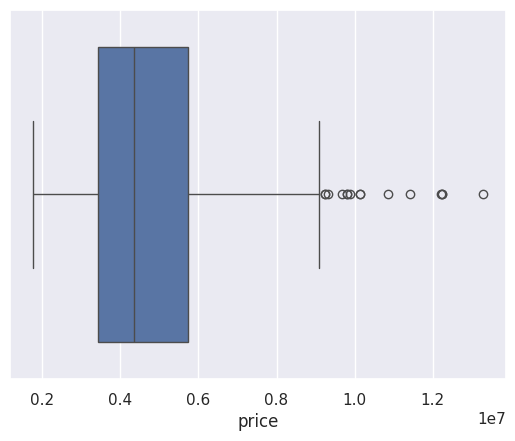

In [ ]:
sns.boxplot(x=df["price"])
plt.show()

In [ ]:
df1=df.loc[:,df.dtypes!=object]
df1

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [ ]:
l=list(df.loc[:,df.dtypes!=object].columns)
l

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
#handling outliers with zscores
z=np.abs(zscore(df[l]))


,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,1.576868,0.991879,1.308863,0.570187,0.929397,1.517692
541,1.605149,1.268613,0.047278,0.570187,0.929397,0.805741
542,1.614327,0.705921,1.308863,0.570187,0.929397,0.805741
543,1.614327,1.033389,0.047278,0.570187,0.929397,0.805741


In [ ]:
df3=df[(z<3).all(axis=1)]
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


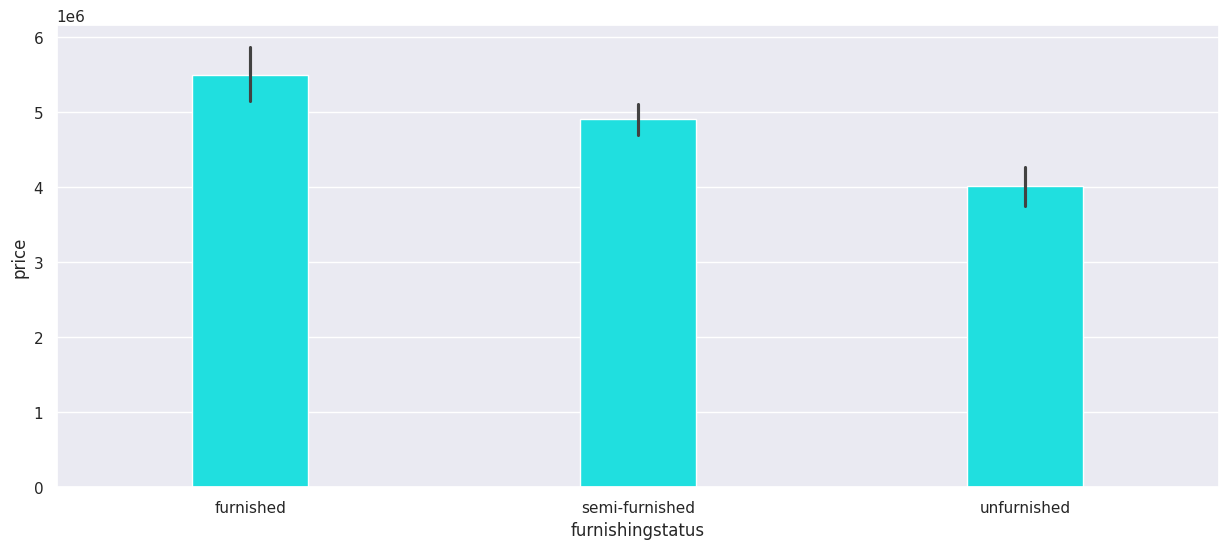

In [ ]:
#bargraph
plt.figure(figsize=(15,6))
sns.barplot(x="furnishingstatus",y="price",data=df,color="cyan",width=0.3)
plt.show()

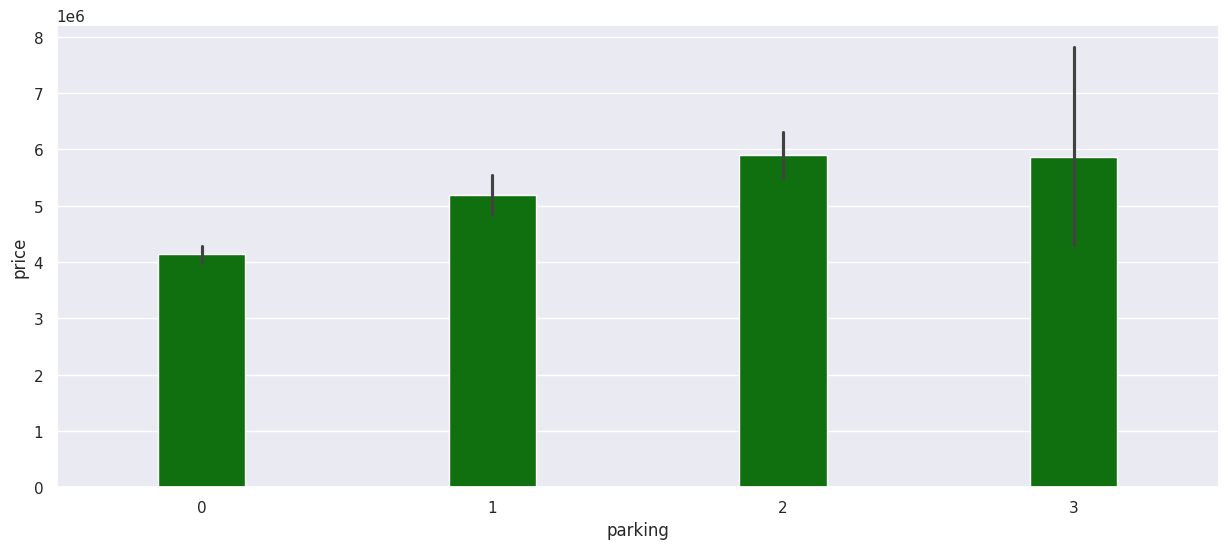

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="parking",y="price",data=df,color="green",width=0.3)
plt.show()

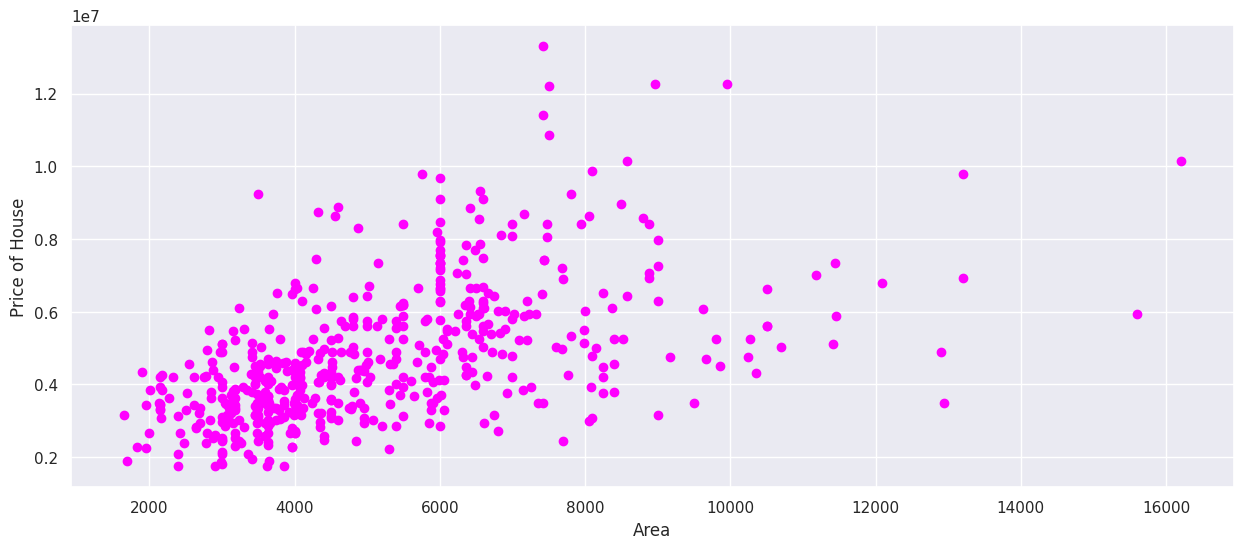

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["area"],y=df["price"],color="magenta")
plt.xlabel("Area")
plt.ylabel("Price of House")
plt.show()

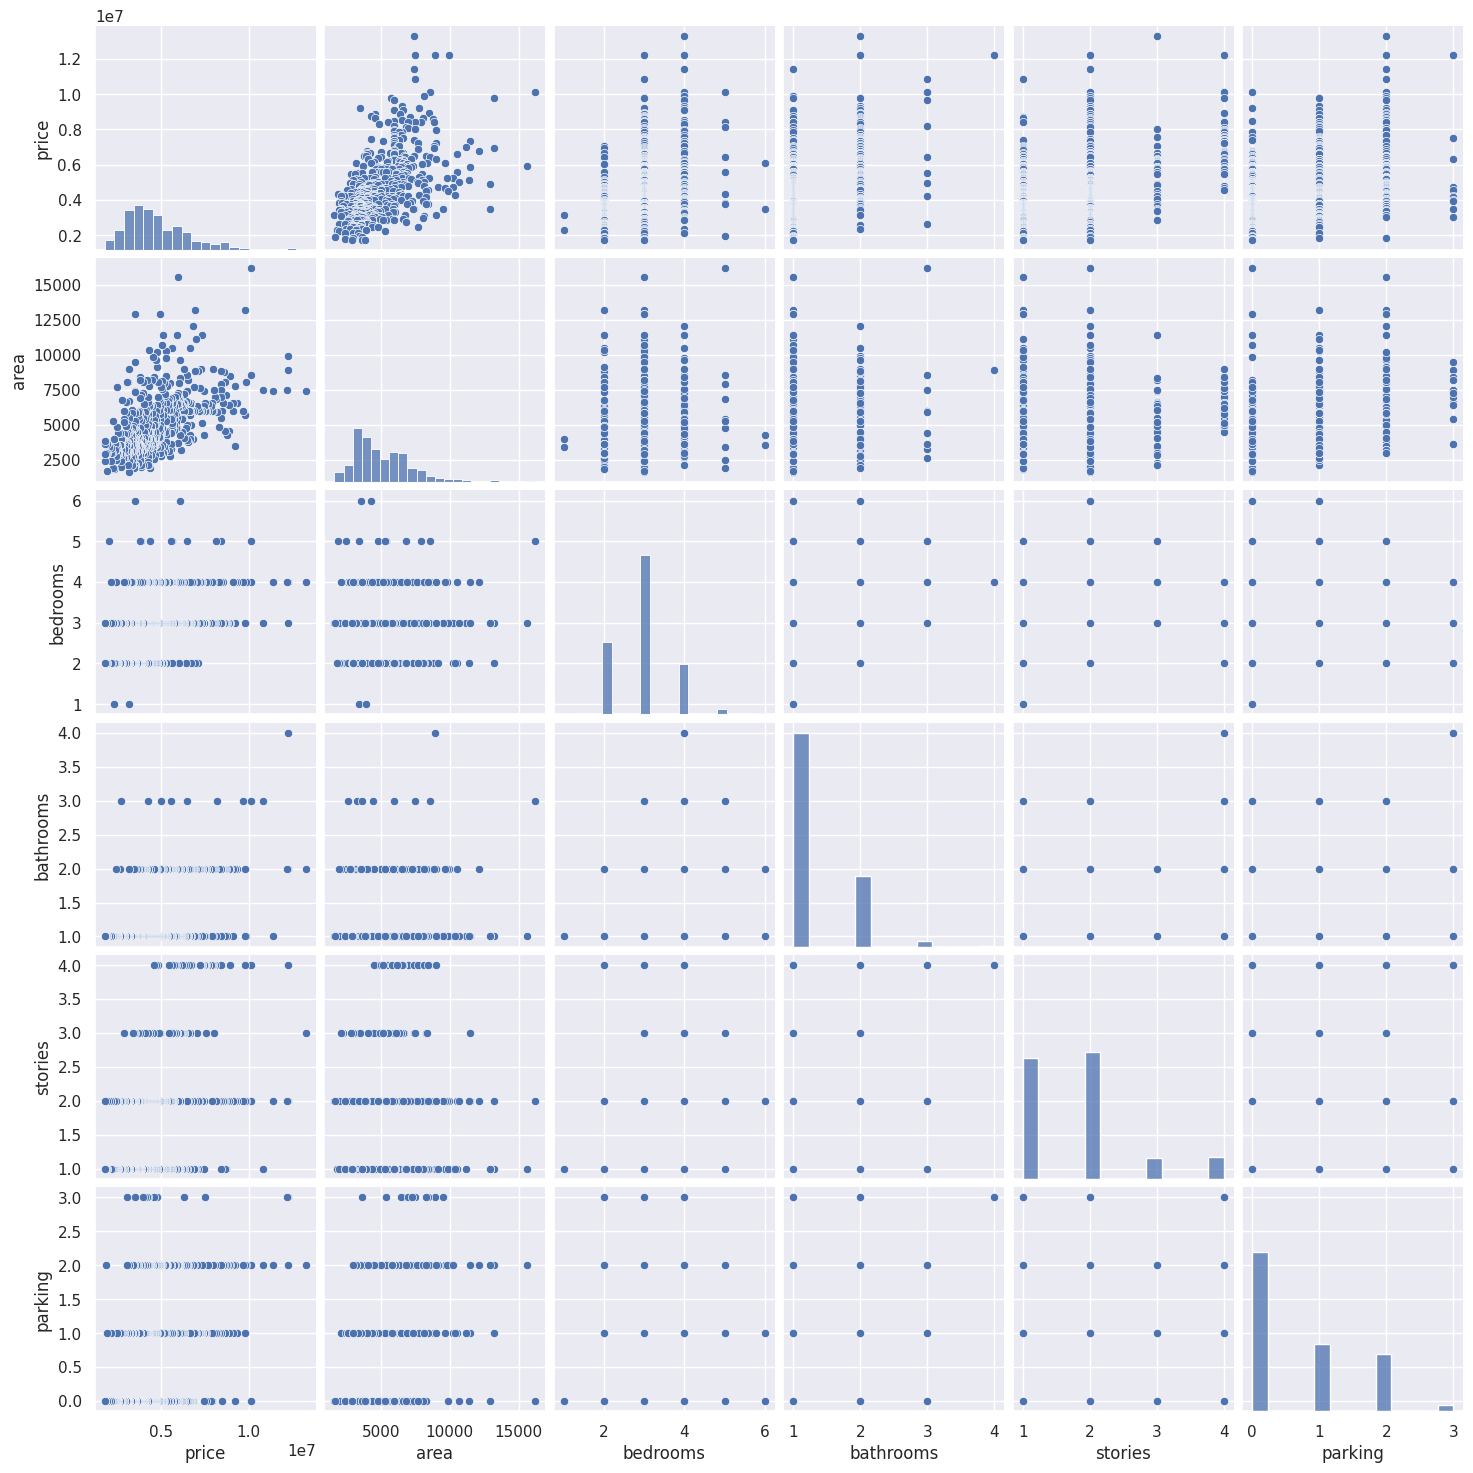

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
correlation=df1.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


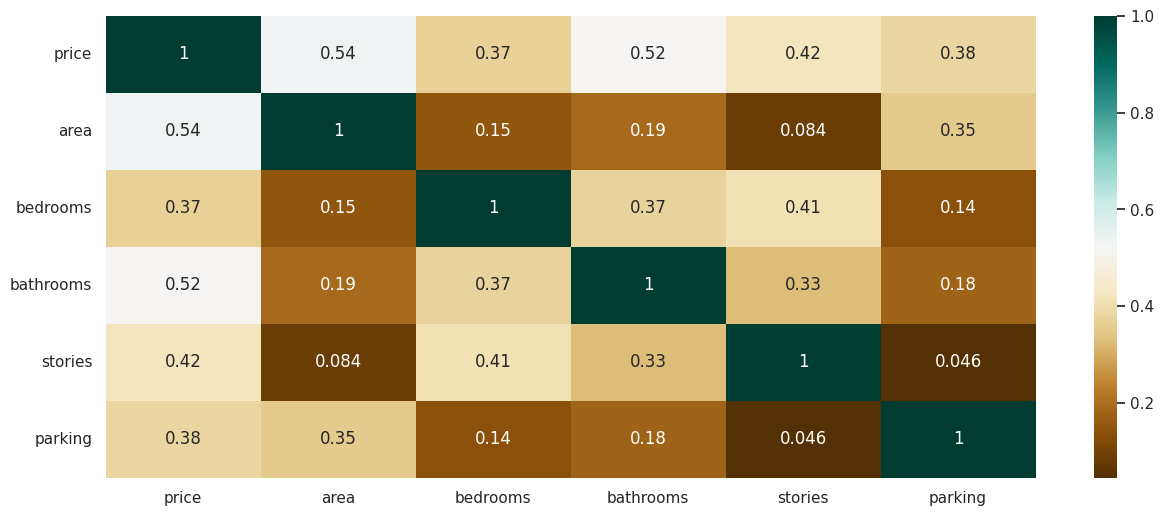

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(correlation,cmap="BrBG",annot=True)
plt.show()

In [ ]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 8 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             522 non-null    int64 
 1   area              522 non-null    int64 
 2   bedrooms          522 non-null    int64 
 3   bathrooms         522 non-null    int64 
 4   stories           522 non-null    int64 
 5   mainroad          522 non-null    object
 6   guestroom         522 non-null    object
 7   basement          522 non-null    object
 8   hotwaterheating   522 non-null    object
 9   airconditioning   522 non-null    object
 10  parking           522 non-null    int64 
 11  furnishingstatus  522 non-null    object
dtypes: int64(6), object(6)
memory usage: 53.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols=["mainroad","guestroom","basement","hotwaterheating","airconditioning","furnishingstatus"]
Label_Encoder=LabelEncoder()
for i in cat_cols:
  df3[i]=Label_Encoder.fit_transform(df3[i])

print(df3)
df3.shape

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
8    9870000  8100         4          1        2         1          1   
9    9800000  5750         3          2        4         1          1   
12   9310000  6550         4          2        2         1          0   
13   9240000  3500         4          2        2         1          0   
14   9240000  7800         3          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  furnishingstatus  
8           1                0                

(522, 12)

In [ ]:
#Creating feature and target variable
X=df3.drop(["price","stories","basement"],axis=1)
y=df3["price"]
print("the Feature variables are",list(X.columns))
print("the Traget variable is",y)

the Feature variables are ['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking', 'furnishingstatus']
the Traget variable is 8      9870000
9      9800000
12     9310000
13     9240000
14     9240000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 522, dtype: int64


In [ ]:
#converting dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(365, 9)
(365,)
(157, 9)
(157,)


In [ ]:
#Building Models
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [ ]:
scoreLR=LR.score(X_test,y_test)
scoreLR

0.5531983093120392

In [ ]:
scoreLR=LR.score(X_train,y_train)
scoreLR

0.6216219661851099

In [ ]:
y_pred1=LR.predict(X_test)
y_pred1

array([4053367.43216543, 3300710.21786681, 4896185.37491689,
       3643194.06738143, 5811055.58442106, 3540740.90307642,
       6557772.63093341, 2253802.15648466, 5044900.96422536,
       4285764.5968512 , 3485769.60892576, 5889436.75045567,
       5864719.78858392, 6192416.18094428, 4753728.77595018,
       5385972.8617143 , 3844208.18571573, 2228510.71306338,
       3483667.67551863, 6041243.62214446, 4728755.67828375,
       3154523.46990642, 3700394.43381883, 4927460.04884836,
       5851285.25341077, 5084027.24723898, 6034839.01464194,
       6376601.87564936, 3188382.0725612 , 5060423.05376428,
       3056818.13516677, 2394279.03381489, 5159993.9757053 ,
       3598770.95642279, 7180671.02214121, 2887842.37595188,
       5811341.68688252, 5183547.77349134, 7378619.80536583,
       5590840.66259307, 4493747.02060843, 4502216.5478438 ,
       4478332.4654006 , 4156565.39396269, 3958450.63205402,
       3612511.09908485, 5747584.59970528, 7283524.68520587,
       5941439.74885084,

In [ ]:
#evaluating model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae1=mean_absolute_error(y_test,y_pred1)
mse1=mean_squared_error(y_test,y_pred1)
rsq1=np.sqrt(mse1)
r2LR=r2_score(y_test,y_pred1)
print("mean absolute error for train data",mae1)
print("root mean squared error for train data",rsq1)
print("r2_score for train data",r2LR)


mean absolute error for train data 794314.4344543458
root mean squared error for train data 1046631.9491310315
r2_score for train data 0.5531983093120392


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2=dtr.predict(X_test)
y_pred2

array([4200000., 2450000., 7875000., 3710000., 7700000., 3675000.,
       4690000., 2135000., 3150000., 4025000., 3409000., 4025000.,
       5320000., 8890000., 3500000., 6090000., 4900000., 4340000.,
       3633000., 6300000., 4655000., 3290000., 4795000., 3640000.,
       5383000., 4007500., 5250000., 7560000., 4830000., 6020000.,
       3570000., 2450000., 3290000., 4375000., 6195000., 3850000.,
       5250000., 6685000., 4690000., 9240000., 6020000., 7343000.,
       4340000., 4480000., 2940000., 3255000., 7700000., 9800000.,
       4515000., 4200000., 4795000., 3640000., 4480000., 3500000.,
       5740000., 3640000., 2450000., 3633000., 4515000., 3360000.,
       6160000., 7700000., 3360000., 6020000., 2800000., 5250000.,
       6720000., 3062500., 6720000., 4550000., 5565000., 7350000.,
       2432500., 7875000., 9310000., 6020000., 5390000., 3500000.,
       7560000., 4690000., 3255000., 2450000., 3360000., 2835000.,
       3745000., 3325000., 3885000., 2520000., 2660000., 29400

In [ ]:
scoredtr=dtr.score(X_test,y_test)
scoredtr

-0.023062254523403602

In [ ]:
scoredtr=dtr.score(X_train,y_train)
scoredtr


0.9984872748234666

In [ ]:
#evaluating model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae2=mean_absolute_error(y_test,y_pred2)
mse2=mean_squared_error(y_test,y_pred2)
rsq2=np.sqrt(mse2)
r2dtr=r2_score(y_test,y_pred2)
print("mean absolute error",mae2)
print("root mean squared error",rsq2)
print("r2_score",r2dtr)

mean absolute error 1162070.4458598725
root mean squared error 1583753.598789591
r2_score -0.023062254523403602


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred3=rfr.predict(X_test)
y_pred3

array([3770900.        , 2538340.        , 5967395.        ,
       3763200.        , 6256600.        , 3796800.        ,
       6533100.        , 2394630.        , 4135950.        ,
       4494770.        , 3394264.08333333, 4823805.        ,
       5703950.        , 6007645.        , 4231500.        ,
       5234320.        , 4003580.        , 3720930.5       ,
       3116400.        , 6756505.        , 4583891.66666667,
       3297612.5       , 4768050.        , 4530470.        ,
       5661145.        , 4843825.        , 5714450.        ,
       7542080.        , 3467432.5       , 4751950.        ,
       3396540.        , 2437750.        , 4155200.        ,
       4280633.        , 7182385.        , 3581398.16666667,
       5267500.        , 5696810.        , 5463955.        ,
       5645640.        , 5083190.        , 5450655.        ,
       4288480.        , 3601290.        , 3374630.        ,
       4106130.        , 6537475.        , 8308790.        ,
       5225710.        ,

In [ ]:
scorerfr=rfr.score(X_test,y_test)
scorerfr

0.4526574188975545

In [ ]:
scorerfr=rfr.score(X_train,y_train)
scorerfr

0.9386157352964772

In [ ]:
#Evaluating model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae3=mean_absolute_error(y_test,y_pred3)
mse3=mean_squared_error(y_test,y_pred3)
rsq3=np.sqrt(mse3)
r2rfr=r2_score(y_test,y_pred3)
print("mean absolute error",mae3)
print("root mean squared error",rsq3)
print("r2_score",r2rfr)



mean absolute error 870916.0552016984
root mean squared error 1158420.4128860265
r2_score 0.4526574188975545


In [ ]:
#Choosing Random Forest Regression as it gives better score,builts pattern between data,computes well.
df_predicted=pd.DataFrame({"predicted price":y_pred3})
df_predicted

,predicted price
0,3770900.0
1,2538340.0
2,5967395.0
3,3763200.0
4,6256600.0
...,...
152,4899335.0
153,6387920.0
154,4851000.0
155,5274150.0
